## Multiple Recordings
Here, I show you how you can combine multiple recordings and access the spikes from them. First, a little bit about the general idea: </br>
We have already loaded single recordings using the Overview.Recording class. This class enables us to load the spikes and get other information about a single recording. </br>
With multiple recordings, the idea is to "store" many of these single recording objects in a single class, so that we can access all of them easily. </br>
Fundamentally, each of the single recordings are still accessible as single recordings, we just create a more abstract layer on top that eases a combined access to many individual recordings. </br>
When we load spikes, what will happen is that the request is send to each individual recording and each individual recording file is searched in parallel for the correct spikes we need for the analysis. </br>
Afterwards, these spikes are combined before appearing to the user inside a single dataframe as before. Ok, enough theory, lets have a look how this works.

In [9]:
from polarspike import Overview, spiketrain_plots
import pandas as pd
import numpy as np
import panel as pn
pn.extension("tabulator")

### Combining recordings
There are many ways to combine recordings. The first one is two load single recordings first, and then combine them:

In [2]:
recording_1 = Overview.Recording.load(r"A:\Marvin\chicken_19_07_2024\Phase_00\overview")
recording_2 = Overview.Recording.load(r"A:\Marvin\chicken_18_07_2024\Phase_00\overview")

We need to establish an object that stores all recordings. <b> Importantly, we need to provide a folder that this object can access to store temporary data </b>

In [3]:
recordings = Overview.Recording_s(analysis_path=r"D:\combined_analysis", analysis_name="chicken_analysis")

Once created, we can add recordings to this object.

In [4]:
recordings.add_recording(recording_1)
recordings.add_recording(recording_2)

### Combining recordings #2
Another way is to load the single recordings directly from file:

In [36]:
recordings = Overview.Recording_s(analysis_path=r"D:\combined_analysis", analysis_name="chicken_analysis")

In [37]:
recordings.add_from_saved(r"A:\Marvin\chicken_19_07_2024\Phase_00\overview")
recordings.add_from_saved(r"A:\Marvin\chicken_18_07_2024\Phase_00\overview")

### Combining recordings #3
We can also mix up the methods

In [38]:
recordings = Overview.Recording_s(analysis_path=r"D:\combined_analysis", analysis_name="chicken_analysis")
recordings.add_from_saved(r"A:\Marvin\chicken_19_07_2024\Phase_00\overview")

In [39]:
recordings.add_recording(recording_2)

### Removing recording
To remove a recording you can do:

In [40]:
recordings.remove_recording("chicken_19_07_2024_p0")

To see which recordings where added you can do:

In [41]:
recordings.recordings.keys()

dict_keys(['chicken_18_07_2024_p0'])

Lets add back the second one

In [43]:
recordings.add_from_saved(r"A:\Marvin\chicken_19_07_2024\Phase_00\overview")
recordings.recordings.keys()

dict_keys(['chicken_18_07_2024_p0', 'chicken_19_07_2024_p0'])

Now, we have combined the information from these two recordings in one object. The general structure of the object remains the same as for a single recording:

In [5]:
recordings.spikes_df

,cell_index,stimulus_name,stimulus_index,nr_of_spikes,centres_x,centres_y,recording,filter,qi
0,0,moving_bars,0,3078,0.0,1400.0,chicken_19_07_2024_p0,True,NaN
1,0,fff,1,5134,0.0,1400.0,chicken_19_07_2024_p0,True,NaN
2,0,20px_20Hz_shuffle_noise,2,55993,0.0,1400.0,chicken_19_07_2024_p0,True,NaN
3,0,chirp,3,4854,0.0,1400.0,chicken_19_07_2024_p0,True,NaN
4,0,chirp610_w,4,3844,0.0,1400.0,chicken_19_07_2024_p0,True,NaN
...,...,...,...,...,...,...,...,...,...
25048,465,chirp560,17,0,NaN,NaN,chicken_18_07_2024_p0,True,0.0
25049,465,chirp610,18,0,NaN,NaN,chicken_18_07_2024_p0,True,0.0
25050,465,chirp,19,0,NaN,NaN,chicken_18_07_2024_p0,True,0.0
25051,465,csteps,20,0,NaN,NaN,chicken_18_07_2024_p0,True,0.0


The spikes_df now containes all cells from two different recordings, rather than just from a single one

In [7]:
recordings.stimulus_df.head(5)

,stimulus_name,begin_fr,end_fr,trigger_fr_relative,trigger_int,stimulus_index,stimulus_repeat_logic,stimulus_repeat_sublogic,sampling_freq,recording,trigger_ends,nr_repeats
0,moving_bars,1396679,5397727,"[0, 354, 721, 1052, 1383, 1719, 2054, 2383, 27...","[354, 367, 331, 331, 336, 335, 329, 334, 337, ...",0,1,1,20000.0,chicken_19_07_2024_p0,"[354, 721, 1052, 1383, 1719, 2054, 2383, 2717,...",12000
1,fff,5611221,10413539,"[0, 80028, 160067, 240106, 320145, 400183, 480...","[80028, 80039, 80039, 80039, 80038, 80040, 800...",1,6,2,20000.0,chicken_19_07_2024_p0,"[80028, 160067, 240105, 320144, 400183, 480222...",10
2,20px_20Hz_shuffle_noise,11724766,52000000,"[0, 975, 1975, 2976, 3976, 4974, 5974, 6974, 7...","[975, 1000, 1001, 1000, 998, 1000, 1000, 1000,...",2,36000,1,20000.0,chicken_19_07_2024_p0,"[661, 1636, 2636, 3637, 4637, 5635, 6635, 7635...",1
3,chirp,55571776,58481767,"[0, 60235, 727504, 787744, 1455006, 1515233, 2...","[60235, 667269, 60240, 667262, 60227, 667262, ...",3,2,1,20000.0,chicken_19_07_2024_p0,"[60227, 727497, 787731, 1455006, 1515233, 2182...",4
4,chirp610_w,58953191,61863699,"[0, 60189, 727621, 787818, 1455250, 1515447, 2...","[60189, 667432, 60197, 667432, 60197, 667432, ...",4,2,1,20000.0,chicken_19_07_2024_p0,"[60189, 727621, 787818, 1455250, 1515439, 2182...",4


Equally, the stimulus_df contains the stimulus information from to recordings now. In Jupyter-Lab we can access the dataframes interactively.

In [10]:
recordings.show_df()

Column(height=800, sizing_mode='fixed', width=1000)
    [0] Row
        [0] Column
            [0] Select(options=['cell_index', ...], value='cell_index')
            [1] Column
                [0] FloatInput(name='Min cell_index')
                [1] FloatInput(name='Max cell_index', value=549.0)
        [1] Column
            [0] Select(options=['All', 'moving_bars', ...], value='All')
        [2] Column
            [0] Select(options=['All', 'chicken_19_07_202...], value='All')
        [3] Column
            [0] TextInput(name='Query', placeholder='Enter query')
            [1] Markdown(str, styles={'color': 'red'})
    [1] Tabulator(height=500, layout='fit_columns', pagination='remote', sizing_mode='fixed', value=       cell_index  ..., width=1000)

We can access the single recordings as well, if needed. The indexing is based on the recording name, which must be unique.

In [12]:
recordings.recordings["chicken_18_07_2024_p0"].spikes_df

,cell_index,stimulus_index,stimulus_name,nr_of_spikes,centres_x,centres_y,recording,filter,qi
0,0,0,moving_bars,4155,0.0,1400.0,chicken_18_07_2024_p0,True,NaN
1,0,1,moving_bars_560,3935,0.0,1400.0,chicken_18_07_2024_p0,True,NaN
2,0,2,moving_bars_416,2400,0.0,1400.0,chicken_18_07_2024_p0,True,NaN
3,0,3,20px_20Hz_shuffle_noise,68148,0.0,1400.0,chicken_18_07_2024_p0,True,NaN
4,0,4,moving_bars_460,3143,0.0,1400.0,chicken_18_07_2024_p0,True,NaN
...,...,...,...,...,...,...,...,...,...
10225,465,17,chirp560,0,NaN,NaN,chicken_18_07_2024_p0,True,0.0
10226,465,18,chirp610,0,NaN,NaN,chicken_18_07_2024_p0,True,0.0
10227,465,19,chirp,0,NaN,NaN,chicken_18_07_2024_p0,True,0.0
10228,465,20,csteps,0,NaN,NaN,chicken_18_07_2024_p0,True,0.0


### Getting spikes
Getting spikes can be done as previously, but this method will become very messy, since we now have 3 dimensions: recording, stimulus, cell </br>
As example, lets load all spikes for the full field flash stimulus from the first recording added.

In [16]:
spikes = recordings.get_spikes_triggered([["chicken_19_07_2024_p0"]], [[["fff"]]], [[["all"]]])

This will return the dataframe containing the spikes. This dataframe has now one more column called "recording", which stores from which recording the spike was recorded.

In [17]:
spikes

,cell_index,times,times_relative,trigger,repeat,times_triggered,stimulus_index,recording
0,0,280.57130,0.01025,0,0,0.01025,1,chicken_19_07_2024_p0
1,0,280.57280,0.01175,0,0,0.01175,1,chicken_19_07_2024_p0
2,0,280.58390,0.02285,0,0,0.02285,1,chicken_19_07_2024_p0
3,0,280.58780,0.02675,0,0,0.02675,1,chicken_19_07_2024_p0
4,0,280.59015,0.02910,0,0,0.02910,1,chicken_19_07_2024_p0
...,...,...,...,...,...,...,...,...
2435979,543,6165.29055,237.33260,5,9,21.22825,15,chicken_19_07_2024_p0
2435980,545,6167.26555,239.30760,5,9,23.20325,15,chicken_19_07_2024_p0
2435981,546,6164.09715,236.13920,5,9,20.03485,15,chicken_19_07_2024_p0
2435982,546,6165.39930,237.44135,5,9,21.33700,15,chicken_19_07_2024_p0


We can plot the spikes as before:

C:\Users\Marvin\AppData\Local\Temp\ipykernel_19716\3053606387.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


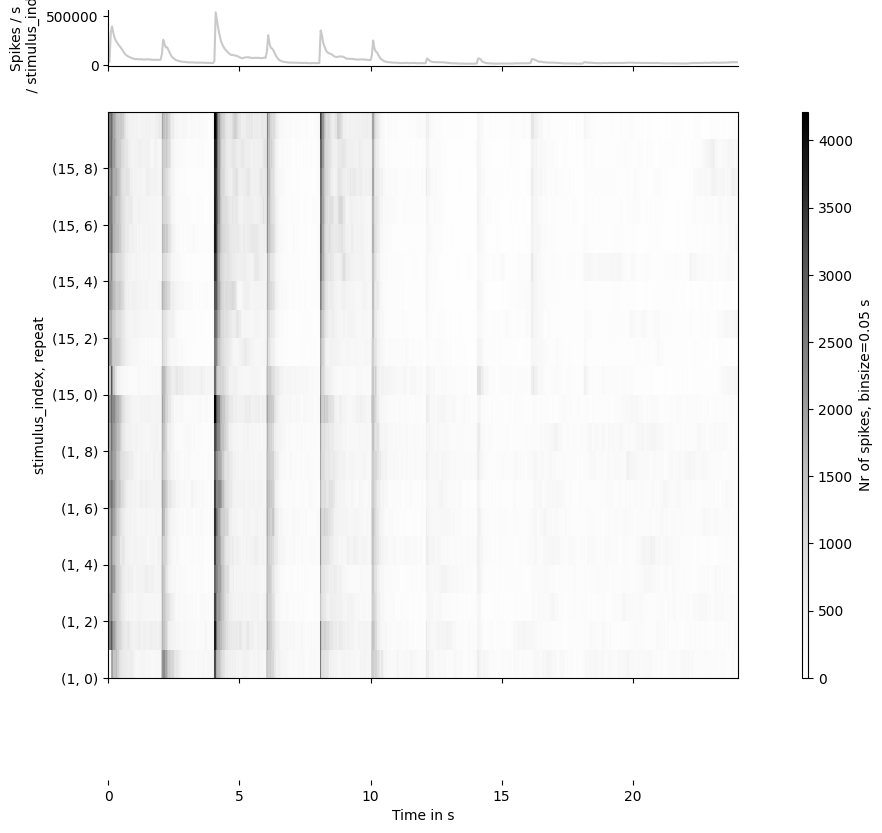

In [18]:
fig, ax = spiketrain_plots.whole_stimulus(spikes, indices=["stimulus_index", "repeat"])
fig.show()

We can load spikes for the same stimulus from multiple recordings:

In [19]:
spikes = recordings.get_spikes_triggered([["all"]], [[["fff"]]], [[["all"]]])

We can then plot and split based on recordings, to see the similarities or differences between recordings:

C:\Users\Marvin\AppData\Local\Temp\ipykernel_19716\4047710264.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


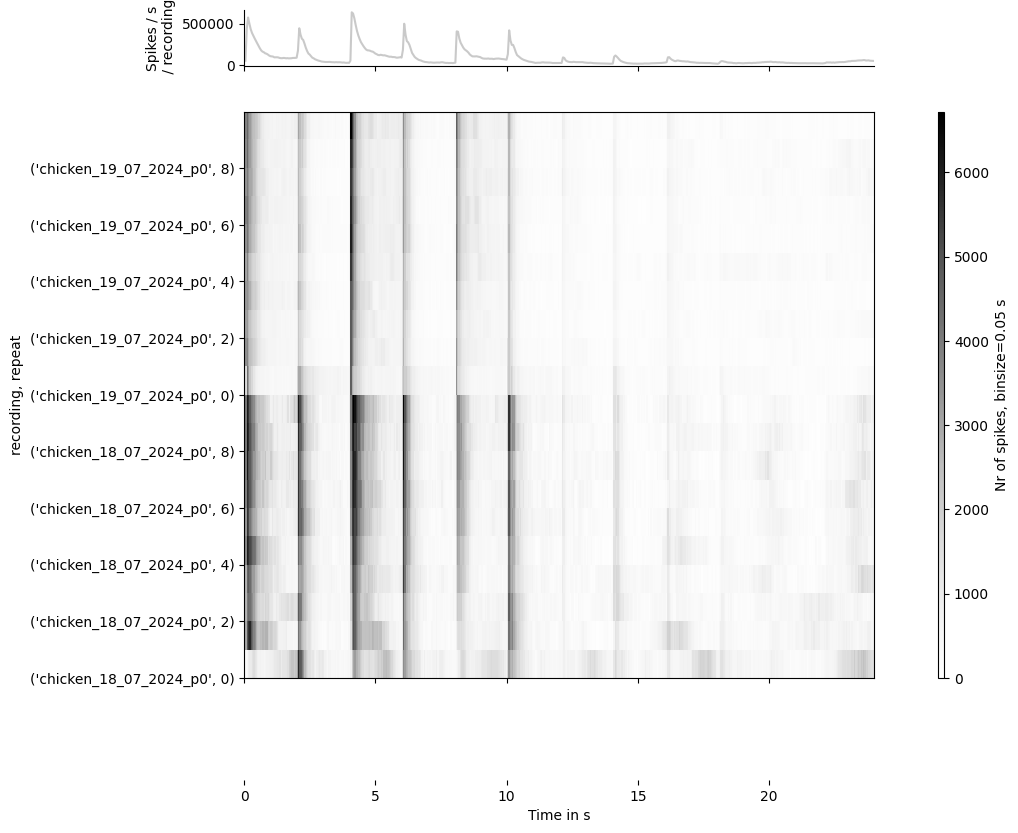

In [21]:
fig, ax = spiketrain_plots.whole_stimulus(spikes, indices=["recording", "repeat"])
fig.show()

You can imagine that loading spikes based on lists is not very efficient and becomes confusing fast. Consider that we want to load a subset of cells from both recordings. </br>
In this case, we need to provide two lists of lists, one for each recording referring to the cells to be loaded. This is already confusing to read.

In [22]:
spikes = recordings.get_spikes_triggered([["all"]], [[["fff"]]], [[[1, 2, 3, 4, 5]], [[10, 11, 12]]])

A better way is to filter dataframes in the way that we need. This is where we can make use of the ability to add new dataframes to the recordings object.
For example, lets say we want all spikes for full field flash stimuli, but only for cells that pass a specific quality index. </br>
1. We create a new dataframe.
2. We filter that dataframe based on our needs.
3. We load all cells that got not filtered out.

In [27]:
# 1. New dataframe
recordings.dataframes["fff_subset"] = recordings.spikes_df.query("stimulus_name=='fff'")

In [28]:
# 2. Filtering
recordings.dataframes["fff_subset"] = recordings.dataframes["fff_subset"].query("qi>0.2")
recordings.dataframes["fff_subset"]

,cell_index,stimulus_name,stimulus_index,nr_of_spikes,centres_x,centres_y,recording,filter,qi
14829,0,fff,6,9299,0.0,1400.0,chicken_18_07_2024_p0,True,0.976739
14873,2,fff,6,8105,200.0,1300.0,chicken_18_07_2024_p0,True,1.048865
14895,3,fff,6,8027,200.0,1300.0,chicken_18_07_2024_p0,True,0.719615
14917,4,fff,6,3782,200.0,1300.0,chicken_18_07_2024_p0,True,0.458397
14939,5,fff,6,15,300.0,1300.0,chicken_18_07_2024_p0,True,0.210817
...,...,...,...,...,...,...,...,...,...
24861,456,fff,6,4244,1300.0,1400.0,chicken_18_07_2024_p0,True,0.499338
24883,457,fff,6,1375,1400.0,1400.0,chicken_18_07_2024_p0,True,0.202677
24905,458,fff,6,15116,1400.0,1400.0,chicken_18_07_2024_p0,True,1.048568
24927,459,fff,6,766,1400.0,1400.0,chicken_18_07_2024_p0,True,0.387271


In [29]:
# 3. Loading spikes
# Here we point this function to the just created and filtered dataframe. This function will then load spikes for all the cells that remain in this dataframe.
good_spikes = recordings.get_spikes_df(cell_df="fff_subset")

C:\Users\Marvin\AppData\Local\Temp\ipykernel_19716\1248219510.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


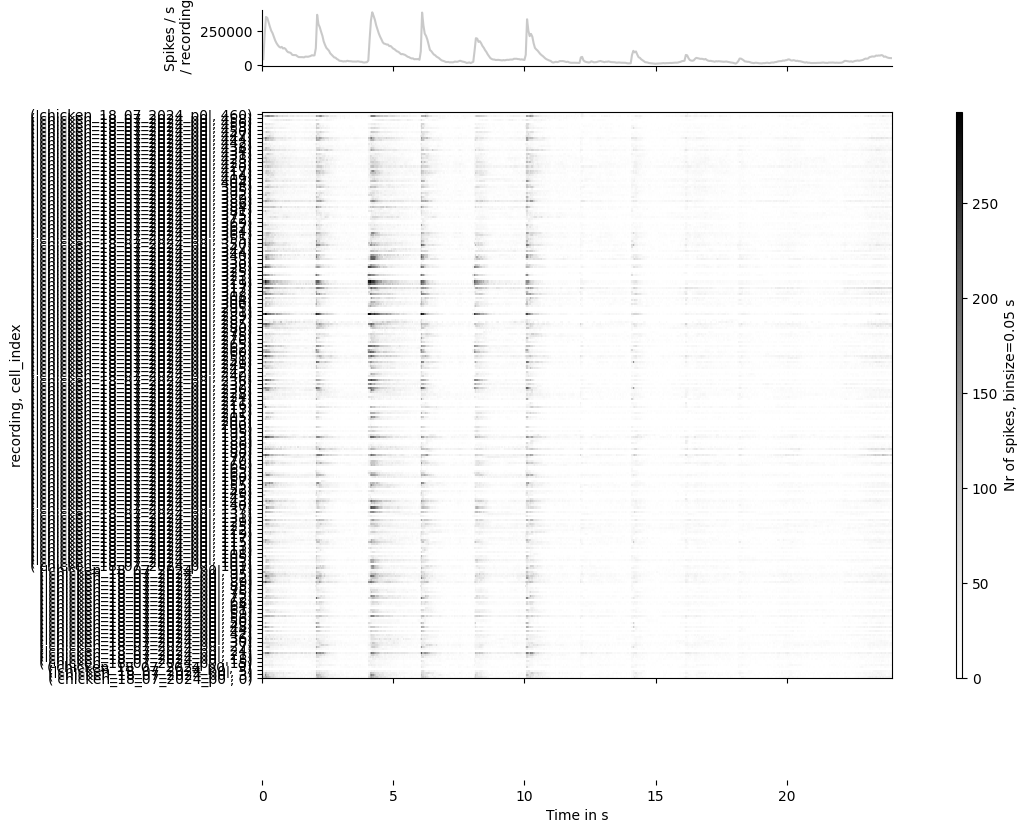

In [30]:
fig, ax = spiketrain_plots.whole_stimulus(good_spikes, indices=["recording", "cell_index"])
fig.show()

The good way about this approach is that we can do very specific filtering, without becoming confused about what we actually load.

### Saving
We dont need to load individual recordings every single time. We can save a given combination of recordings as recordings object to file and load this the next time we wish to plot something or do analysis.

In [32]:
recordings.save("D:\combined_analysis\chicken_combined")

### Loading

In [34]:
recordings = Overview.Recording_s.load("D:\combined_analysis\chicken_combined")

The newly created and filtered dataframe has been saved!

In [35]:
recordings.dataframes["fff_subset"]

,cell_index,stimulus_name,stimulus_index,nr_of_spikes,centres_x,centres_y,recording,filter,qi
14829,0,fff,6,9299,0.0,1400.0,chicken_18_07_2024_p0,True,0.976739
14873,2,fff,6,8105,200.0,1300.0,chicken_18_07_2024_p0,True,1.048865
14895,3,fff,6,8027,200.0,1300.0,chicken_18_07_2024_p0,True,0.719615
14917,4,fff,6,3782,200.0,1300.0,chicken_18_07_2024_p0,True,0.458397
14939,5,fff,6,15,300.0,1300.0,chicken_18_07_2024_p0,True,0.210817
...,...,...,...,...,...,...,...,...,...
24861,456,fff,6,4244,1300.0,1400.0,chicken_18_07_2024_p0,True,0.499338
24883,457,fff,6,1375,1400.0,1400.0,chicken_18_07_2024_p0,True,0.202677
24905,458,fff,6,15116,1400.0,1400.0,chicken_18_07_2024_p0,True,1.048568
24927,459,fff,6,766,1400.0,1400.0,chicken_18_07_2024_p0,True,0.387271
